# Analytics Final Porject
## Seoul Bike

**Objective**: Accurately estimate bike rental demand at each hour to ensure a stable supply

### 1. The dataset

The Ddareungi dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), date information (actual date, whether it is a holiday).

The dataset includes 14 variables and 8760 records. A description of each variable is provided below.

| Variable | Description |
| --- | --- |
| Date | Day/Month/Year |
| Rented Bike count | Count of bikes rented at each hour |
| Hour | our of the day: 0 to 23 |
| Temperature | measured in Celsius |
| Humidity | humidity ratio (%) |
| Windspeed | wind speed measured in m/s |
| Visibility-10m | 10-meter visibility score |
| Dew point temperature | measured in Celsius |
| Solar radiation | solar radiation, measured as Megajoules per square meter (MJ/m 2) |
| Rainfall | rainfall measured in millimeters (mm) |
| Snowfall | snowfall measured in centimeters (cm) |
| Seasons | season of the year: ‘Winter’, ‘Spring’, ‘Summer’, ‘Autumn’ |
| Holiday | whether it is a holiday: ‘Holiday’, ‘No Holiday’ |
| Functioning Day | whether the system is functional: Yes/No |


### 2. Load Data

In [1]:
# Import the Python libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
# Suppress only specific types of warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Suppress future deprecation warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)  # Suppress deprecation warnings

sns.set()
sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
bike_df = pd.read_csv('SeoulBike.csv')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 3. Understanding Data

In [3]:
bike_df.shape

(8760, 14)

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
#check for null values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

***Observation: No missing values***

In [7]:
#Check for duplicated rows
bike_df.duplicated().sum()

0

***Observation: No duplicated values***

In [8]:
bike_df['Date'].dtype

dtype('O')

In [9]:
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')

In [10]:
bike_df['Year'] = bike_df['Date'].dt.year

In [11]:
starting_year = bike_df['Year'].min()
ending_year = bike_df['Year'].max()
print(f"Starting Year: {starting_year}, Ending Year: {ending_year}")

Starting Year: 2017, Ending Year: 2018


In [12]:
bike_df['Month'] = bike_df['Date'].dt.month

In [13]:
starting_month = bike_df['Month'][0]
ending_month = bike_df['Month'][8759]
print(f"Starting month: {starting_month}, Ending month: {ending_month}")

Starting month: 12, Ending month: 11


In [14]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11


**Observation: Data is collect from December 1, 2017 - November 30, 2018**

In [15]:
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [17]:
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

**Overall Observation: TBD**

### 4. Data Preparation

In [18]:
#Creating the column to extract the day of the week to analyze weekday vs. weekend trends
bike_df['Day_of_Week'] = bike_df['Date'].dt.day_name()

In [19]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [20]:
#Saving the original season column before one-hot encoding
original_seasons = bike_df['Seasons']

In [21]:
#Converting Seasons into one-hot encoded variable
bike_df = pd.get_dummies(bike_df, columns=['Seasons'], drop_first=True)

In [22]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day_of_Week,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017,12,Friday,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017,12,Friday,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,2017,12,Friday,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,2017,12,Friday,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,2017,12,Friday,0,0,1


In [23]:
#Encoding Categorical Variables such as Holiday and Functioning Day
bike_df['Holiday'] = bike_df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
bike_df['Functioning Day'] = bike_df['Functioning Day'].map({'Yes': 1, 'No': 0})

In [24]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day_of_Week,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,Friday,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,Friday,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,12,Friday,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,Friday,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,12,Friday,0,0,1


In [25]:
#Deleting row with operation Functioning = 0, not useful for analysis
rows_to_delete = bike_df[bike_df['Functioning Day'] == 0].index
bike_df.drop(rows_to_delete, inplace = True)

In [26]:
bike_df.shape

(8465, 19)

In [27]:
#Deleting Functioning Day column as all the values are 1 (redundant column)
#Deleting date column as month, year and day of the week has been extracted

columns_to_delete = ['Date','Functioning Day']
bike_df.drop(columns = columns_to_delete, inplace=True)

In [28]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Year,Month,Day_of_Week,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,2017,12,Friday,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,2017,12,Friday,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,2017,12,Friday,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,2017,12,Friday,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,2017,12,Friday,0,0,1


In [29]:
bike_df['Day_of_Week'].value_counts()

Monday       1248
Friday       1224
Sunday       1224
Saturday     1217
Wednesday    1200
Thursday     1200
Tuesday      1152
Name: Day_of_Week, dtype: int64

In [30]:
#Converting Day_of_Week into one-hot encoded variable
bike_df = pd.get_dummies(bike_df, columns=['Day_of_Week'], drop_first=True)

In [31]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,0,0,1,0,0,0,0,0,0


### 5. Data Exploration

##### Indentifying correlation between Bikes Rented and other variables

In [32]:
bike_df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
Rented Bike Count,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611,...,0.167186,0.015580,0.282001,-0.458920,0.000910,-0.000992,-0.058725,-0.006849,0.009981,0.025820
Hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.004691,0.144658,0.014345,-0.022082,...,0.001048,-0.000594,-0.000603,-0.000594,-0.000422,0.002479,-0.000418,-0.000413,-0.000403,-0.000413
Temperature(°C),0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746,...,0.213947,0.012123,0.677872,-0.740433,0.009564,0.009487,0.004558,-0.011701,-0.002800,0.003608
Humidity(%),-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127,...,0.139090,0.017463,0.198198,-0.240090,0.001062,-0.029639,0.009000,0.049658,-0.019655,0.018045
Wind speed (m/s),0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789,...,-0.154149,0.074645,-0.066895,0.111378,-0.010407,0.024320,-0.055012,0.012392,0.017117,0.028176
Visibility (10m),0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860,...,0.063474,-0.185450,0.066203,0.011642,-0.017497,-0.003190,-0.029695,-0.014383,0.035684,0.036892
Dew point temperature(°C),0.400263,0.004691,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760,...,0.239406,0.006471,0.664183,-0.723221,0.012897,-0.008067,0.004047,0.008599,-0.004409,0.010267
Solar Radiation (MJ/m2),0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380,...,-0.028675,0.075799,0.132320,-0.181814,-0.004590,0.032544,-0.013754,-0.022096,-0.009061,0.003120
Rainfall(mm),-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604,...,0.010912,0.019671,0.055087,-0.060480,0.009592,-0.019080,-0.003946,0.021232,0.015065,-0.002661
Snowfall (cm),-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000,...,0.058410,-0.102400,-0.103928,0.223842,-0.017747,-0.005340,-0.005209,-0.006118,0.015213,0.044527


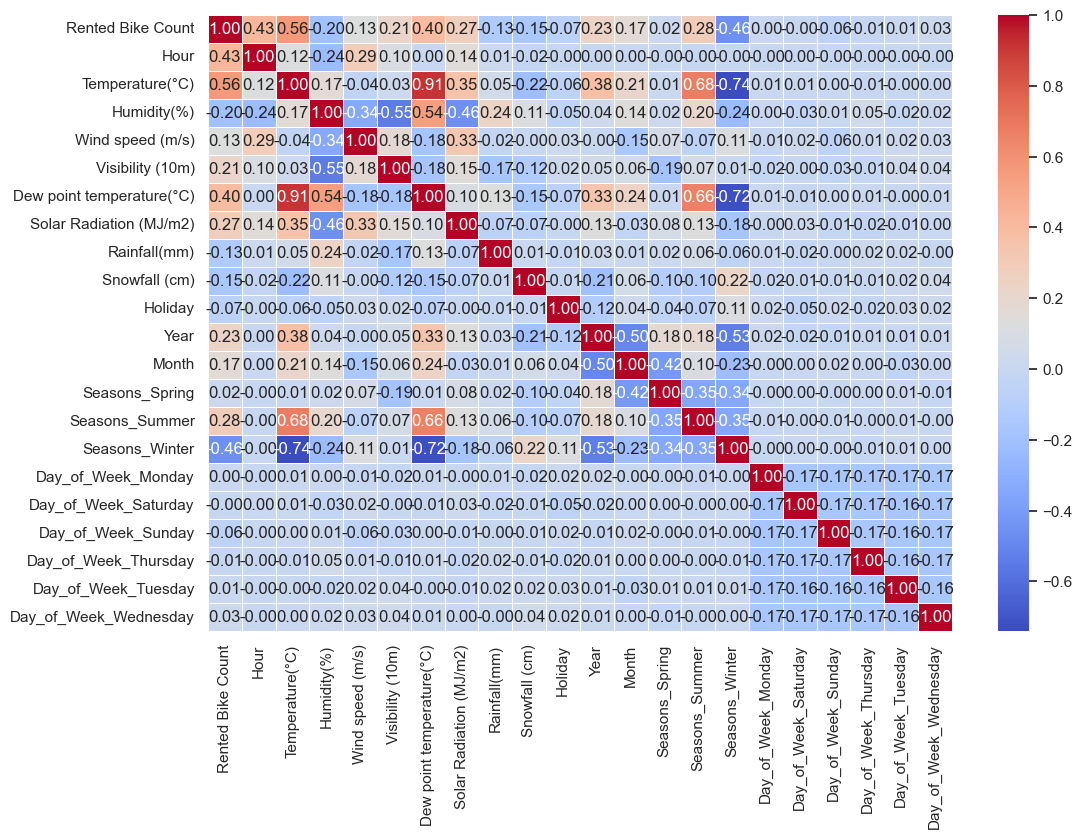

In [33]:
corr_matrix = bike_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

**Observation: Temperature(°C) and Dew point temperature(°C) have very high correlation. One of the column needs to be dropped, choosing Dew point temperature(°C) to drop** 

In [34]:
bike_df.drop(columns = 'Dew point temperature(°C)', inplace=True)

corr_matrix1 = bike_df.corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [35]:
bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Year', 'Month',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday'],
      dtype='object')

#### Data Visualization

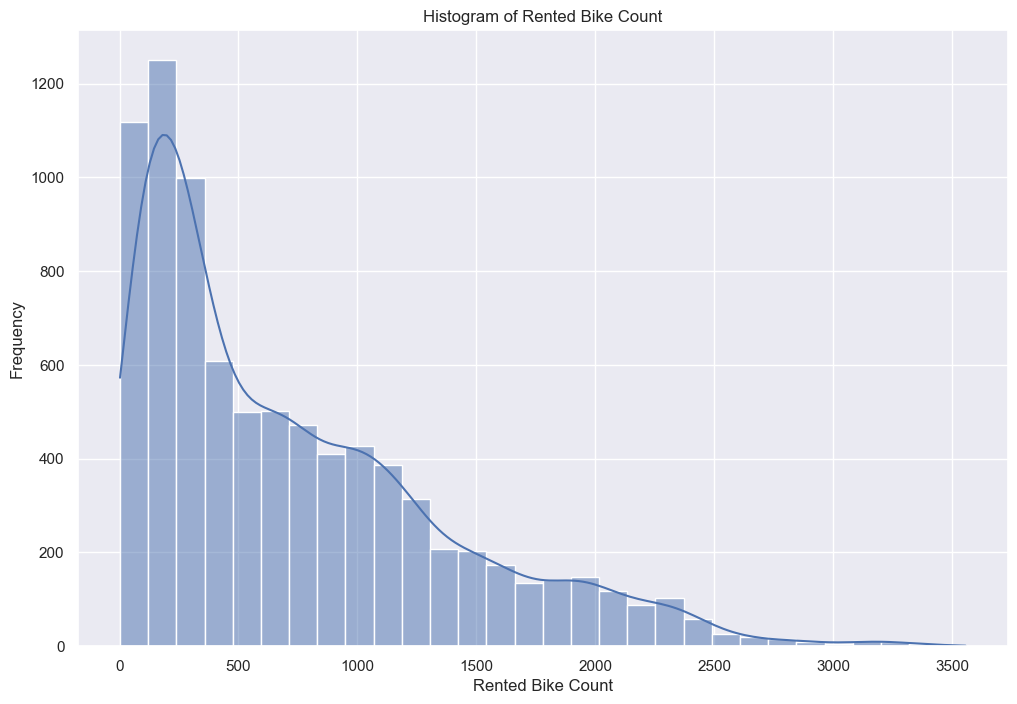

In [36]:
# Histogram to analyze the distribution of bike rentals
sns.histplot(bike_df['Rented Bike Count'], kde=True, bins=30)
plt.title('Histogram of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

**Observations:**
1. Rented bike count is not normally distributed. 
2. Right (Positive) Skewed: Indicates most hours have low rentals, with occasional high-demand periods
3. Unimodal

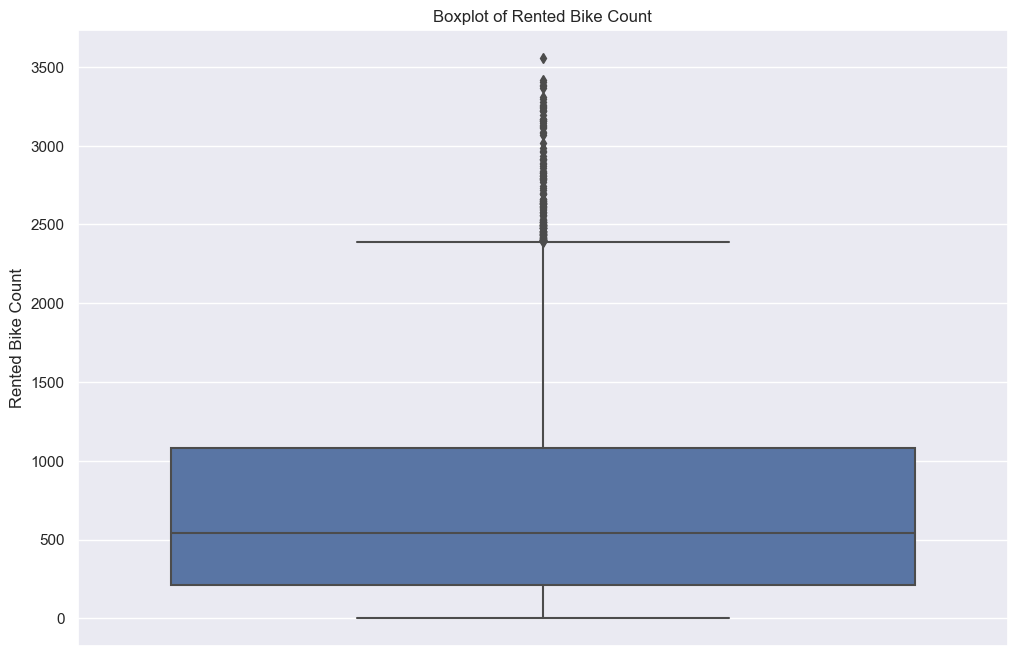

In [37]:
#checking for outliers in Rented Bike Count using a boxplot
sns.boxplot(y='Rented Bike Count', data=bike_df)
plt.title('Boxplot of Rented Bike Count')
plt.ylabel('Rented Bike Count')
plt.show()

In [38]:
Q1 = bike_df['Rented Bike Count'].quantile(0.25)
Q3 = bike_df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")

IQR: 870.0


In [39]:
range_value = bike_df['Rented Bike Count'].max() - bike_df['Rented Bike Count'].min()
print(f"Range: {range_value}, IQR: {IQR}, Ratio: {IQR/range_value:.2f}")

Range: 3554, IQR: 870.0, Ratio: 0.24


In [40]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = bike_df[(bike_df['Rented Bike Count'] > upper_bound) | (bike_df['Rented Bike Count'] < lower_bound)]

print(f"Upper Bound: {upper_bound}, Lower Bound: {lower_bound}")
print(f"Number of Outliers: {len(outliers)}")

Upper Bound: 2389.0, Lower Bound: -1091.0
Number of Outliers: 152


**Observations:**
1. Median rented bike count approximately close to 550; closer to Q1
2. Low ratio between IQR and Range. This indicates that there is normal to low variability in typical demand
3. Number of outliers present: 152

###### Dealing with outliers - Log Tranformation

In [41]:
import numpy as np

In [42]:
bike_df['Log_Rented_Bike_Count'] = np.log1p(bike_df['Rented Bike Count'])

In [43]:
print(bike_df[['Rented Bike Count', 'Log_Rented_Bike_Count']].head())

   Rented Bike Count  Log_Rented_Bike_Count
0                254               5.541264
1                204               5.323010
2                173               5.159055
3                107               4.682131
4                 78               4.369448


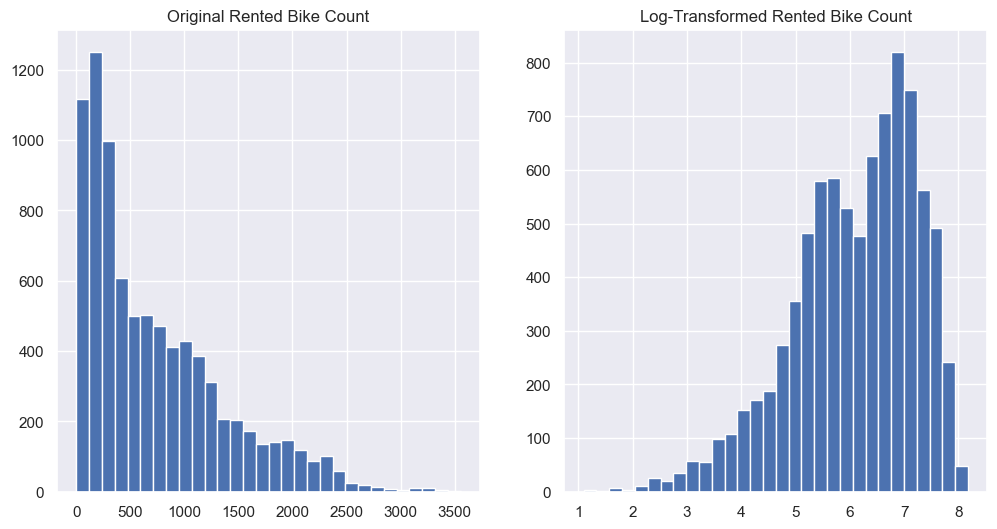

In [44]:
# Plot original and log-transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(bike_df['Rented Bike Count'], bins=30)
plt.title('Original Rented Bike Count')

plt.subplot(1, 2, 2)
plt.hist(bike_df['Log_Rented_Bike_Count'], bins=30)
plt.title('Log-Transformed Rented Bike Count')

plt.show()

bike_df.drop(columns='Log_Rented_Bike_Count', inplace= True)

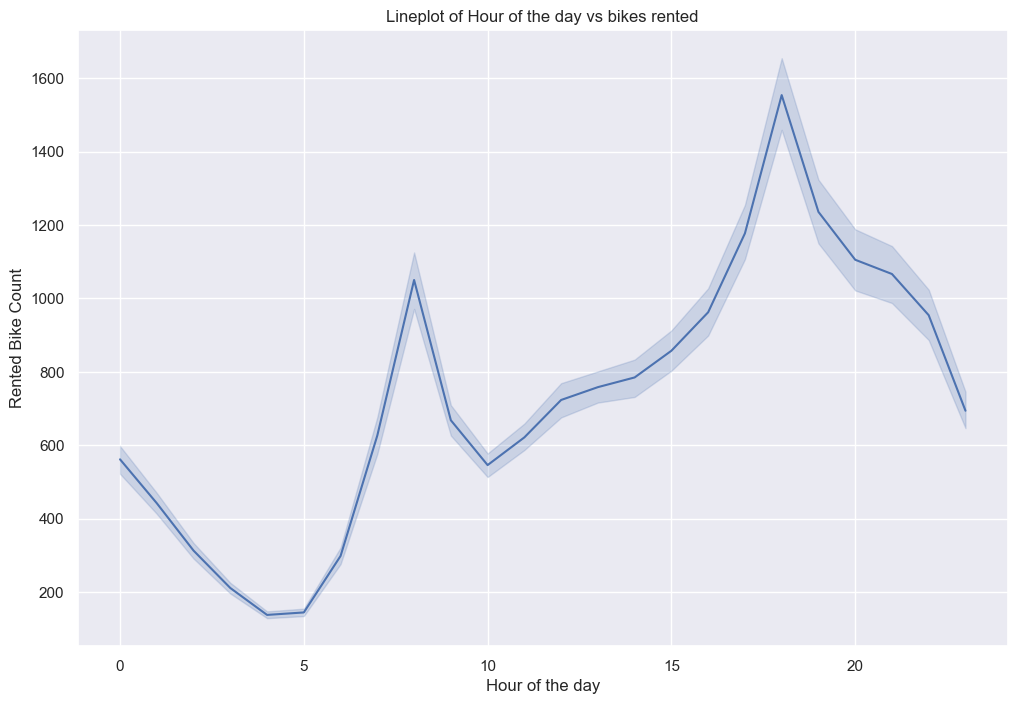

In [45]:
#Line plot to observe how rentals change during the day
sns.lineplot(x='Hour', y='Rented Bike Count', data=bike_df)
plt.title('Lineplot of Hour of the day vs bikes rented')
plt.xlabel('Hour of the day')
plt.ylabel('Rented Bike Count')
plt.show()

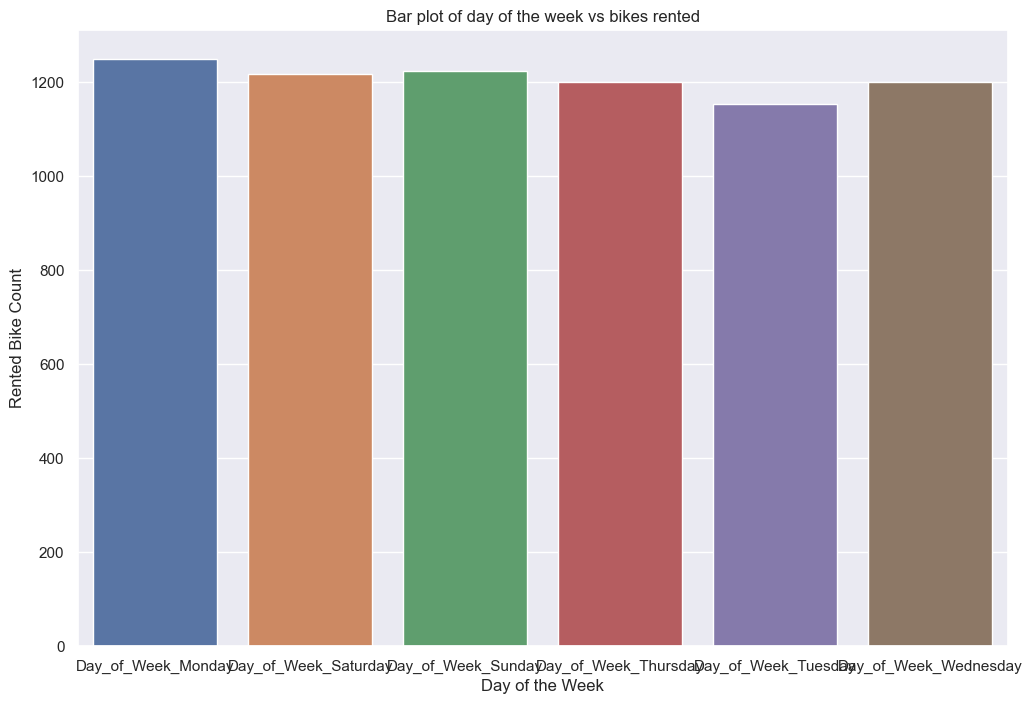

In [46]:
#Bar plot to compare bike rentals across days of the week
sns.barplot(x=bike_df[['Day_of_Week_Monday', 'Day_of_Week_Saturday', 
                       'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
                       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday']].sum(axis=0).index,
            y=bike_df[['Day_of_Week_Monday', 'Day_of_Week_Saturday', 
                       'Day_of_Week_Sunday', 'Day_of_Week_Thursday',
                       'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday']].sum(axis=0).values)
plt.title('Bar plot of day of the week vs bikes rented')
plt.xlabel('Day of the Week')
plt.ylabel('Rented Bike Count')
plt.show()

**Observation: Day of the week does not have a direct impact on number of bikes rented**

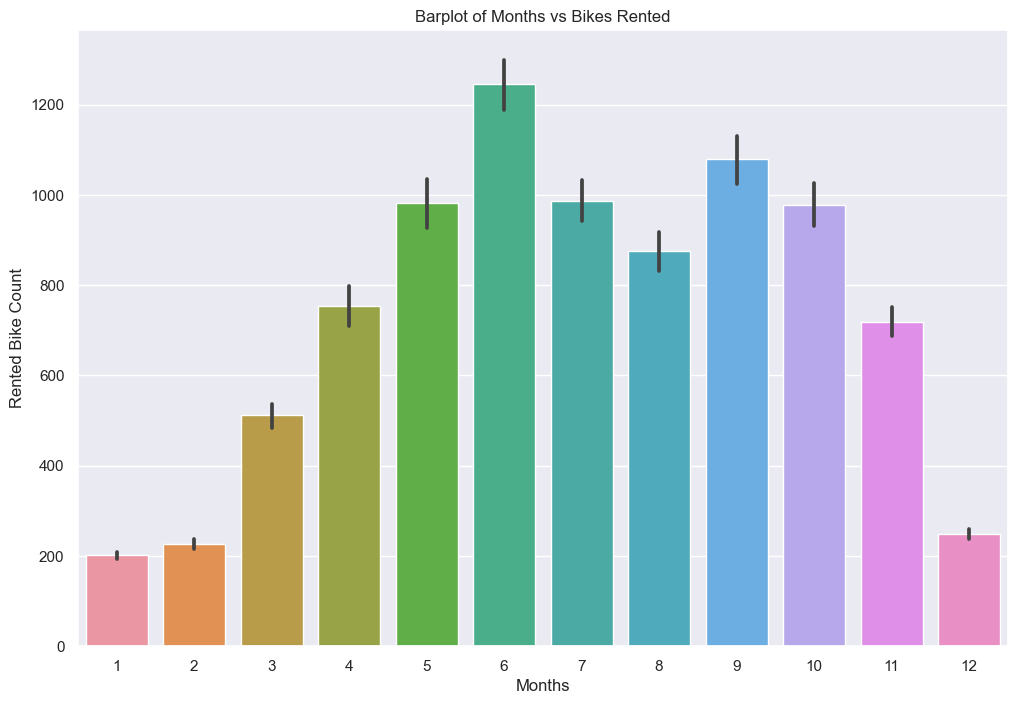

In [47]:
#bar plot to analyze monthly bike rentals over the year
sns.barplot(x='Month', y='Rented Bike Count', data=bike_df)
plt.title('Barplot of Months vs Bikes Rented')
plt.xlabel('Months')
plt.ylabel('Rented Bike Count')
plt.show()

**Observations:**
1. More bikes are rented in mid year indicating summer, autumn and early winter as as peak seasons.
2. less in month Auguts, maybe rainfall?
3. highest in June, summer season

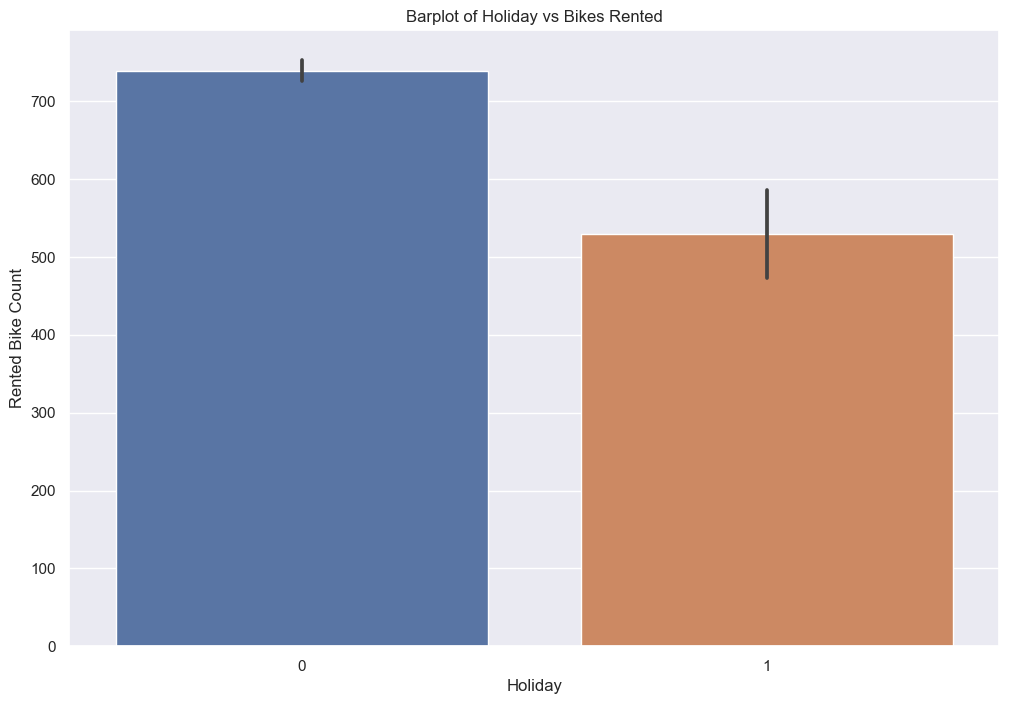

In [48]:
#box plot to analyze bike rentals over holiday
sns.barplot(x='Holiday', y='Rented Bike Count', data=bike_df)
plt.title('Barplot of Holiday vs Bikes Rented')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

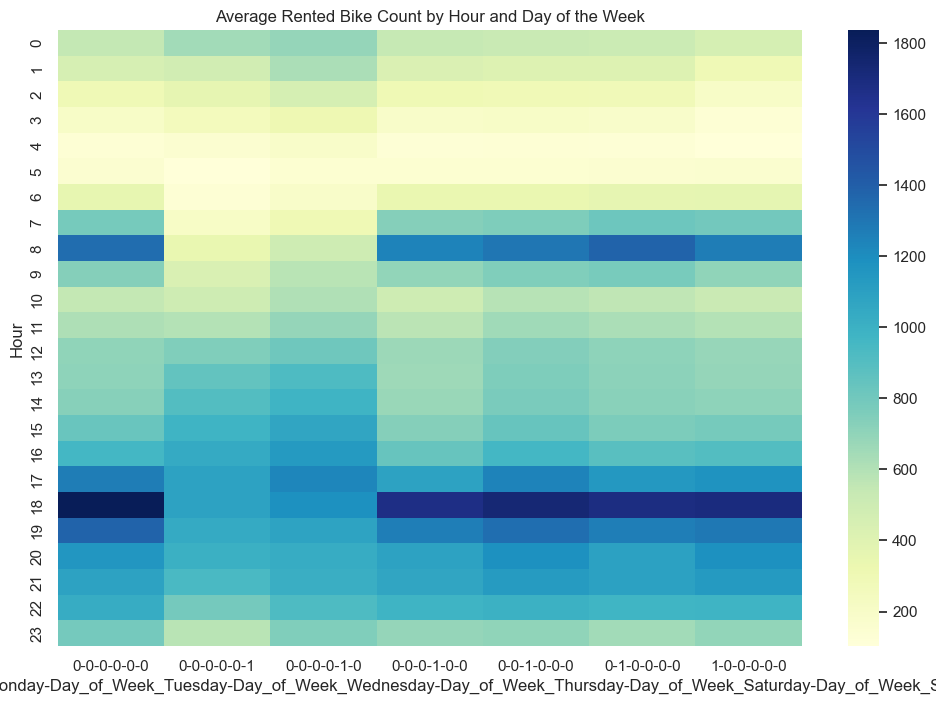

In [55]:
# Create a pivot table with 'Hour' as the index and all Day_of_Week columns as columns
pivot_table = bike_df.pivot_table(index='Hour', 
                                  values='Rented Bike Count', 
                                  columns=['Day_of_Week_Monday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 
                                           'Day_of_Week_Thursday', 'Day_of_Week_Saturday', 
                                           'Day_of_Week_Sunday'], 
                                  aggfunc='mean')

# Plot the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)

# Display the plot
plt.title('Average Rented Bike Count by Hour and Day of the Week')
plt.show()

#### Observations:

1. Working Days: Monday through Thursday show similar patterns with strong morning and evening peaks, typical of commuting behavior2.
2. Weekend Pattern: Saturday and Sunday show more evenly distributed usage throughout the day, without the sharp commuting peaks.
3. The deepest blue colors suggest rental counts reaching around 1800 bikes during peak times.
4. The lightest yellow/green colors indicate minimal rentals (around 200 or fewer bikes) during early morning hours.

In [53]:
# copying the dataframe to another variable for further analysis
new_bike_df = bike_df

In [56]:
# Create 'is_weekday' column: 1 for weekdays (Monday to Thursday), 0 for weekends (Saturday and Sunday)
new_bike_df['is_weekday'] = ((new_bike_df[['Day_of_Week_Monday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Day_of_Week_Thursday']].sum(axis=1) > 0) |((new_bike_df['Day_of_Week_Saturday'] == 0) & (new_bike_df['Day_of_Week_Sunday'] == 0))).astype(int)

# Create 'is_weekend' column: 1 for Saturday and Sunday, 0 for weekdays
new_bike_df['is_weekend'] = ((new_bike_df['Day_of_Week_Saturday'] == 1) | (new_bike_df['Day_of_Week_Sunday'] == 1)).astype(int)

# Verify the new columns
new_bike_df[['Day_of_Week_Monday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Day_of_Week_Thursday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'is_weekday', 'is_weekend']].head()

,Day_of_Week_Monday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Day_of_Week_Thursday,Day_of_Week_Saturday,Day_of_Week_Sunday,is_weekday,is_weekend
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [57]:
new_bike_df.drop(columns=['Day_of_Week_Monday','Day_of_Week_Tuesday','Day_of_Week_Wednesday','Day_of_Week_Thursday','Day_of_Week_Saturday','Day_of_Week_Sunday'], inplace=True)

In [58]:
new_bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Year,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Log_Rented_Bike_Count,is_weekday,is_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,2017,12,0,0,1,5.541264,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,2017,12,0,0,1,5.323010,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,2017,12,0,0,1,5.159055,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,2017,12,0,0,1,4.682131,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,2017,12,0,0,1,4.369448,1,0


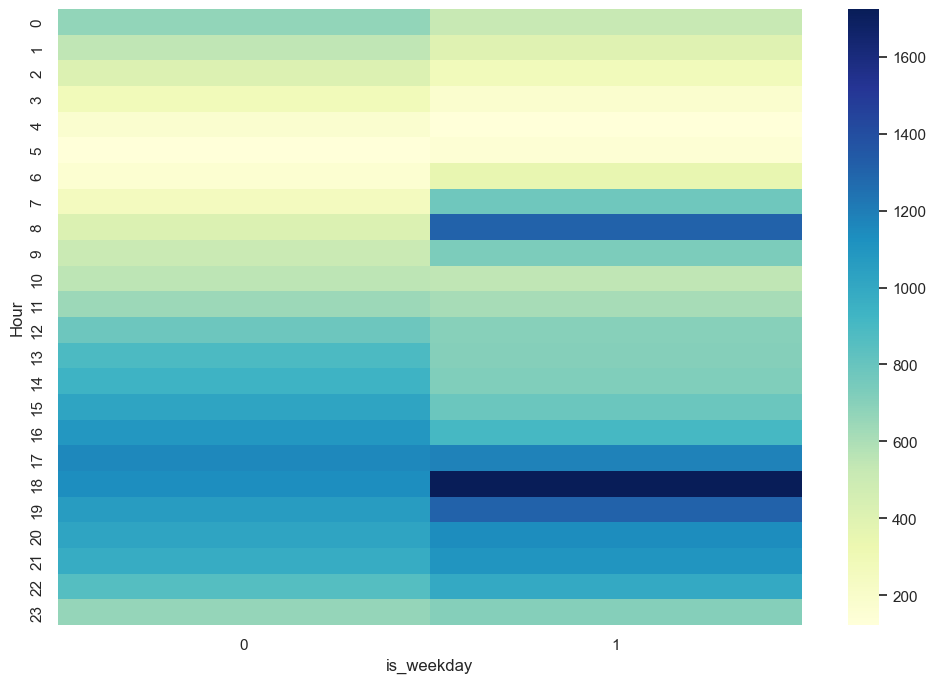

In [59]:
pivot_table = new_bike_df.pivot_table(index='Hour', columns='is_weekday', values='Rented Bike Count', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.show()

In [60]:
df = new_bike_df

In [61]:
df['Season'] = df[['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']].idxmax(axis=1).map({
    'Seasons_Spring': 'Spring', 
    'Seasons_Summer': 'Summer', 
    'Seasons_Winter': 'Winter'})

In [67]:
df['Season'] = df['Season'].fillna('Autumn')

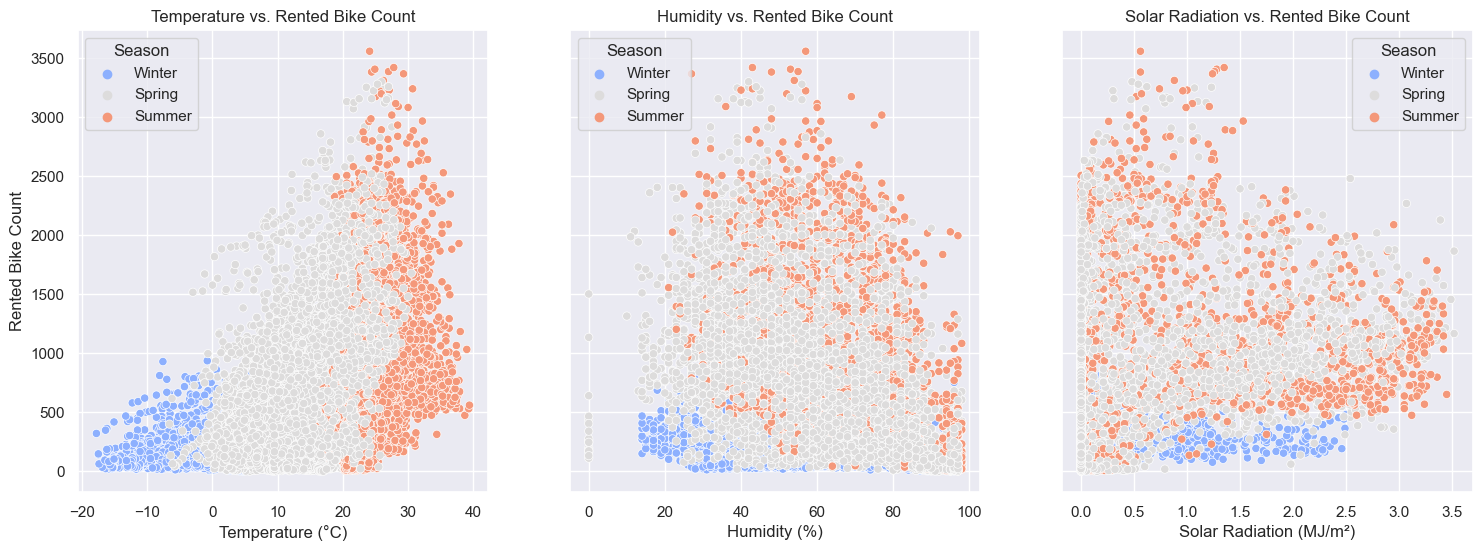

In [68]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Temperature vs. Rented Bike Count
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', 
                hue='Season', palette='coolwarm', data=df, ax=axes[0])
axes[0].set_title('Temperature vs. Rented Bike Count')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Rented Bike Count')

# Humidity vs. Rented Bike Count
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', 
                hue='Season', palette='coolwarm', data=df, ax=axes[1])
axes[1].set_title('Humidity vs. Rented Bike Count')
axes[1].set_xlabel('Humidity (%)')
axes[1].set_ylabel('')

# Solar Radiation vs. Rented Bike Count
sns.scatterplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', 
                hue='Season', palette='coolwarm', data=df, ax=axes[2])
axes[2].set_title('Solar Radiation vs. Rented Bike Count')
axes[2].set_xlabel('Solar Radiation (MJ/m²)')
axes[2].set_ylabel('')

# Adjust layout
plt.show()

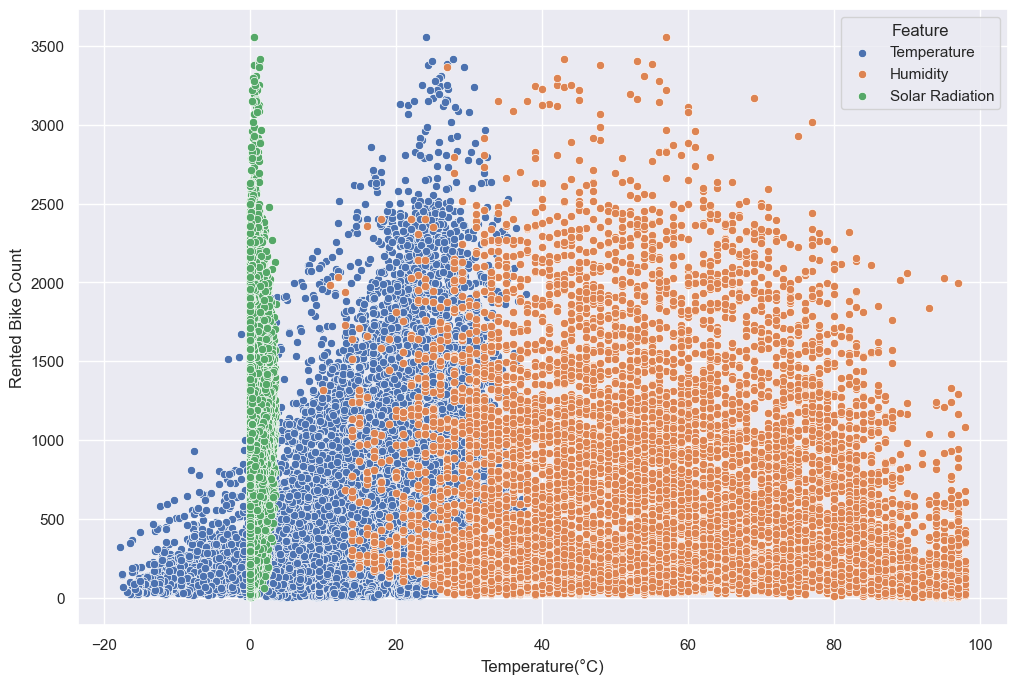

In [71]:
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df, label='Temperature')
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df, label='Humidity')
sns.scatterplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', data=df, label='Solar Radiation')
plt.legend(title='Feature')
plt.show()

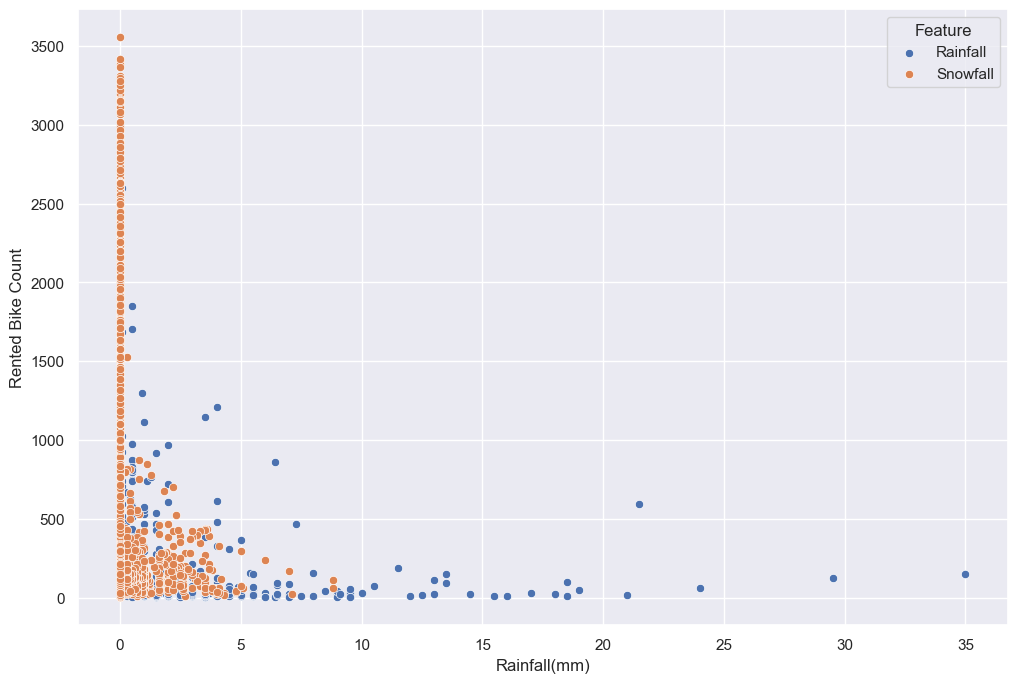

In [73]:
sns.scatterplot(x=bike_df['Rainfall(mm)'], y='Rented Bike Count', data=df,  label='Rainfall')
sns.scatterplot(x=bike_df['Snowfall (cm)'], y='Rented Bike Count', data=df, label='Snowfall')
plt.legend(title='Feature')
plt.show()

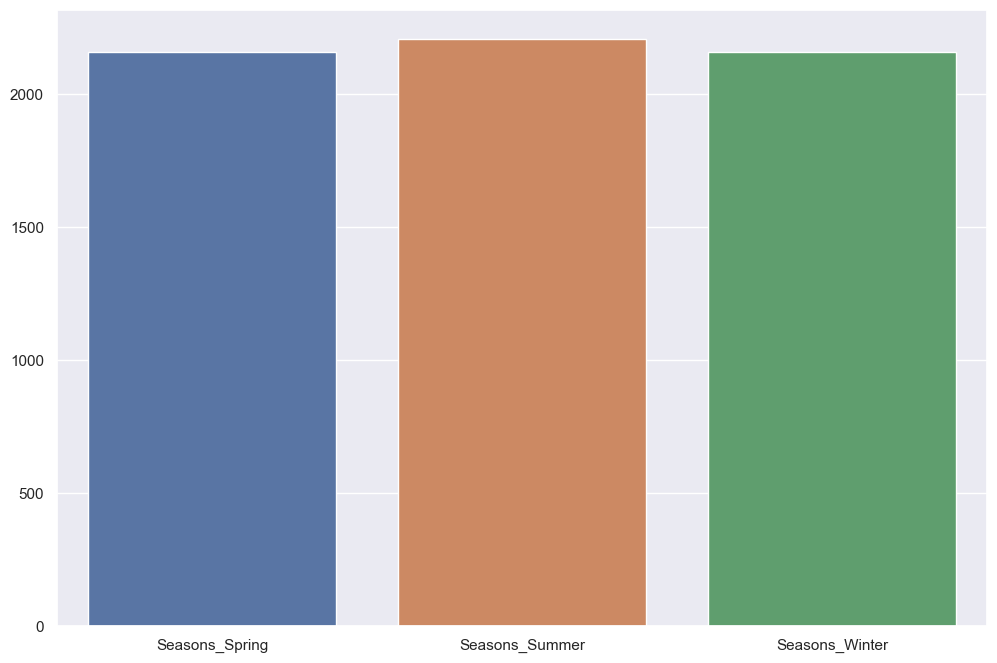

In [74]:
seasons_data = df[['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']]
sns.barplot(x=seasons_data.sum().index, y=seasons_data.sum().values)
plt.show()

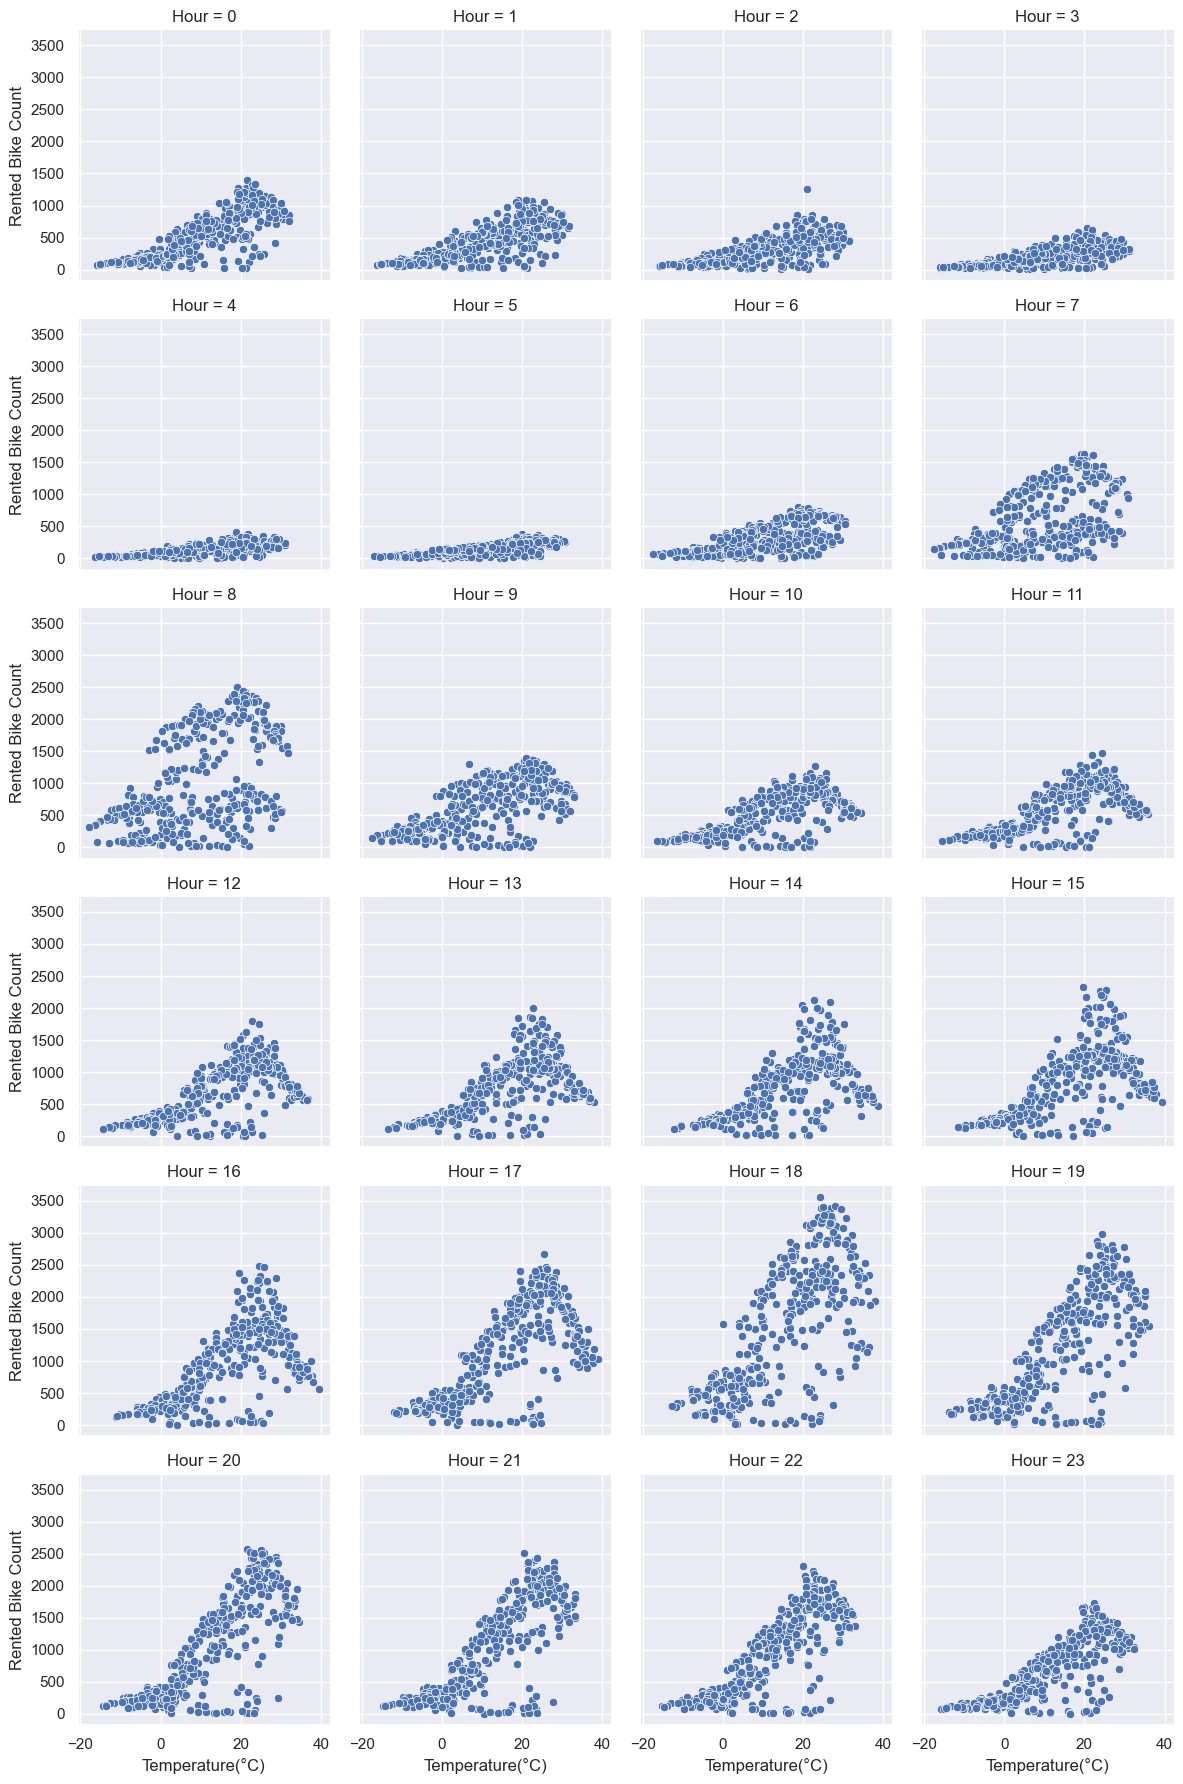

In [75]:
g = sns.FacetGrid(df, col='Hour', col_wrap=4)
g.map(sns.scatterplot, 'Temperature(°C)', 'Rented Bike Count')
plt.show()

#### Hypothesis Testing

#### 1. one-sample t-test

In [77]:
# Perform one-sample t-test
hypothetical_mean = 500
t_statistic, p_value = stats.ttest_1samp(bike_df['Rented Bike Count'], hypothetical_mean)

print("One-Sample T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The average number of rented bikes is significantly different from 500.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average number of rented bikes is different from 500.")

One-Sample T-Test Results:
T-statistic: 32.82268397695274
P-value: 1.610183435087611e-222
Reject the null hypothesis. The average number of rented bikes is significantly different from 500.


Observation: 
1. The average number of rented bikes per hour is significantly different from 500.
2. Given the large positive t-statistic, we can infer that the actual average is higher than 500 bikes per hour.
3. This difference is not likely due to random chance but represents a real difference in the population

In [78]:
sample_mean = bike_df['Rented Bike Count'].mean()
difference_from_500 = sample_mean - 500

print(f"The actual average number of bikes rented per hour: {sample_mean:.2f}")
print(f"Difference from 500: {difference_from_500:.2f}")
print(f"Percentage difference: {(difference_from_500 / 500) * 100:.2f}%")

The actual average number of bikes rented per hour: 729.16
Difference from 500: 229.16
Percentage difference: 45.83%


#### 2. Independent Samples T-Test

In [79]:
# Separate the data into holiday and non-holiday groups
holiday_rentals = bike_df[bike_df['Holiday'] == 1]['Rented Bike Count']
non_holiday_rentals = bike_df[bike_df['Holiday'] == 0]['Rented Bike Count']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(holiday_rentals, non_holiday_rentals)

print("\nIndependent Samples T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in bike rentals between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference in bike rentals between holidays and non-holidays.")


Independent Samples T-Test Results:
T-statistic: -6.461942637055642
P-value: 1.0907798935690002e-10
Reject the null hypothesis. There is a significant difference in bike rentals between holidays and non-holidays.


**Observations:**

1. There is a statistically significant difference in the average number of bike rentals between holidays and non-holidays.
2. The negative t-statistic suggests that the average number of bike rentals on holidays is lower than on non-holidays.
3. This difference is not likely due to random chance but represents a real difference in rental patterns between holidays and non-holidays.

#### 3. One-Way ANOVA testing

In [80]:
weather_conditions = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                      'Visibility (10m)', 'Solar Radiation (MJ/m2)', 
                      'Rainfall(mm)', 'Snowfall (cm)']

def perform_anova(df, condition):
    groups = []
    for category in df[condition].unique():
        group = df[df[condition] == category]['Rented Bike Count']
        groups.append(group)
    
    f_statistic, p_value = stats.f_oneway(*groups)
    return f_statistic, p_value

results = {}
for condition in weather_conditions:
    f_statistic, p_value = perform_anova(bike_df, condition)
    results[condition] = {'F-statistic': f_statistic, 'p-value': p_value}

# Print results
for condition, result in results.items():
    print(f"\nOne-Way ANOVA Results for {condition}:")
    print(f"F-statistic: {result['F-statistic']}")
    print(f"p-value: {result['p-value']}")
    
    # Interpret the results
    alpha = 0.05
    if result['p-value'] < alpha:
        print(f"Reject the null hypothesis. There are significant differences in bike rentals across different {condition} levels.")
    else:
        print(f"Fail to reject the null hypothesis. There is not enough evidence to conclude significant differences in bike rentals across different {condition} levels.")


One-Way ANOVA Results for Temperature(°C):
F-statistic: 8.814410695603105
p-value: 0.0
Reject the null hypothesis. There are significant differences in bike rentals across different Temperature(°C) levels.

One-Way ANOVA Results for Humidity(%):
F-statistic: 10.151719973329088
p-value: 6.026494925693995e-127
Reject the null hypothesis. There are significant differences in bike rentals across different Humidity(%) levels.

One-Way ANOVA Results for Wind speed (m/s):
F-statistic: 7.322572175896547
p-value: 8.003405146873056e-61
Reject the null hypothesis. There are significant differences in bike rentals across different Wind speed (m/s) levels.

One-Way ANOVA Results for Visibility (10m):
F-statistic: 1.0713290887938574
p-value: 0.032482478928827094
Reject the null hypothesis. There are significant differences in bike rentals across different Visibility (10m) levels.

One-Way ANOVA Results for Solar Radiation (MJ/m2):
F-statistic: 4.468596111113155
p-value: 2.804564862544718e-133
Rejec

**Observation:**
1. All weather conditions tested show statistically significant differences in bike rental patterns (p-values < 0.05).
2. Humidity, temperature, and rainfall appear to have the strongest effects on bike rentals, as indicated by their high F-statistics and extremely low p-values.
3. Visibility, while statistically significant, has the least pronounced effect among the tested variables.
4. These results suggest that Ddareungi should consider all these weather factors when estimating bike rental demand, with particular emphasis on humidity, temperature, and rainfall.
5. The company could use these insights to develop more accurate predictive models for hourly bike rental demand, potentially adjusting their supply based on weather forecasts.

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
weather_columns = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                   'Visibility (10m)', 'Solar Radiation (MJ/m2)', 
                   'Rainfall(mm)', 'Snowfall (cm)']

new_bike_df[weather_columns] = scaler.fit_transform(new_bike_df[weather_columns])

In [82]:
new_bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Year,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Log_Rented_Bike_Count,is_weekday,is_weekend,Season
0,254,0,-1.484762,-1.032395,0.458429,0.929577,-0.654079,-0.132495,-0.174951,0,2017,12,0,0,1,5.541264,1,0,Winter
1,204,1,-1.509548,-0.983575,-0.895248,0.929577,-0.654079,-0.132495,-0.174951,0,2017,12,0,0,1,5.323010,1,0,Winter
2,173,2,-1.550858,-0.934756,-0.701865,0.929577,-0.654079,-0.132495,-0.174951,0,2017,12,0,0,1,5.159055,1,0,Winter
3,107,3,-1.567382,-0.885937,-0.798556,0.929577,-0.654079,-0.132495,-0.174951,0,2017,12,0,0,1,4.682131,1,0,Winter
4,78,4,-1.550858,-1.081214,0.555121,0.929577,-0.654079,-0.132495,-0.174951,0,2017,12,0,0,1,4.369448,1,0,Winter


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Define the dependent variable (Y) and independent variables (X)
Y = new_bike_df['Rented Bike Count']

# Select relevant independent variables (excluding 'Rented Bike Count')
X_columns = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
             'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
             'Snowfall (cm)', 'Holiday', 'Year', 'Month', 
             'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
             'is_weekday', 'is_weekend']

X = new_bike_df[X_columns]

# Add a constant term to account for the intercept in the regression model
X = sm.add_constant(X)

In [85]:
#checking for multicolliearity
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Display VIF values
print(vif.round(2))

    VIF Factor                 features
0         0.00                    const
1         1.21                     Hour
2         5.18          Temperature(°C)
3         2.65              Humidity(%)
4         1.30         Wind speed (m/s)
5         1.70         Visibility (10m)
6         1.94  Solar Radiation (MJ/m2)
7         1.07             Rainfall(mm)
8         1.13            Snowfall (cm)
9         1.03                  Holiday
10       18.20                     Year
11       22.56                    Month
12       14.57           Seasons_Spring
13        6.27           Seasons_Summer
14       28.69           Seasons_Winter
15         inf               is_weekday
16         inf               is_weekend


C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\saksh\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


High VIF values indicate multicollinearity issues. Removing the columns with VIF value more than 10. inf indicates perfect multicollinearity

In [86]:
columns_to_drop = ['Year','Month','Seasons_Spring','Seasons_Winter','is_weekend']
new_bike_df.drop(columns=columns_to_drop, inplace=True)

In [87]:
#re-preparing data
# Define the dependent variable (Y) and independent variables (X)
Y1 = new_bike_df['Rented Bike Count']

# Select relevant independent variables (excluding 'Rented Bike Count')
X_columns1 = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
             'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
             'Snowfall (cm)', 'Holiday', 'Seasons_Summer','is_weekday']

X1 = new_bike_df[X_columns1]

# Add a constant term to account for the intercept in the regression model
X1 = sm.add_constant(X1)

In [88]:
#checking for multicolliearity again
# Calculate VIF for each feature
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns

# Display VIF values
print(vif1.round(2))

    VIF Factor                 features
0         7.76                    const
1         1.19                     Hour
2         2.63          Temperature(°C)
3         2.55              Humidity(%)
4         1.27         Wind speed (m/s)
5         1.59         Visibility (10m)
6         1.93  Solar Radiation (MJ/m2)
7         1.07             Rainfall(mm)
8         1.10            Snowfall (cm)
9         1.01                  Holiday
10        1.96           Seasons_Summer
11        1.00               is_weekday


No multicollieanrity, good to go

In [89]:
# Fit OLS regression model
model1 = sm.OLS(Y1, X1).fit()

# Print the summary of the model to evaluate performance
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     855.7
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:05:09   Log-Likelihood:                -63571.
No. Observations:                8465   AIC:                         1.272e+05
Df Residuals:                    8453   BIC:                         1.273e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

p value of Wind speed is high, its not significant

In [90]:
# Apply log transformation to Rented Bike Count
new_bike_df['Log_Rented_Bike_Count'] = np.log1p(new_bike_df['Rented Bike Count'])

In [91]:
#re-preparing data
# Define the dependent variable (Y) and independent variables (X)
Y2 = new_bike_df['Log_Rented_Bike_Count']

# Select relevant independent variables (excluding 'Rented Bike Count')
X_columns2 = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
             'Snowfall (cm)', 'Holiday', 'Seasons_Summer','is_weekday']

X2 = new_bike_df[X_columns2]

# Add a constant term to account for the intercept in the regression model
X2 = sm.add_constant(X2)

In [92]:
new_bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Summer,Log_Rented_Bike_Count,is_weekday,Season
0,254,0,-1.484762,-1.032395,0.458429,0.929577,-0.654079,-0.132495,-0.174951,0,0,5.541264,1,Winter
1,204,1,-1.509548,-0.983575,-0.895248,0.929577,-0.654079,-0.132495,-0.174951,0,0,5.323010,1,Winter
2,173,2,-1.550858,-0.934756,-0.701865,0.929577,-0.654079,-0.132495,-0.174951,0,0,5.159055,1,Winter
3,107,3,-1.567382,-0.885937,-0.798556,0.929577,-0.654079,-0.132495,-0.174951,0,0,4.682131,1,Winter
4,78,4,-1.550858,-1.081214,0.555121,0.929577,-0.654079,-0.132495,-0.174951,0,0,4.369448,1,Winter


In [93]:
#checking for multicolliearity again
# Calculate VIF for each feature
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif2["features"] = X2.columns

# Display VIF values
print(vif2.round(2))

    VIF Factor                 features
0         7.49                    const
1         1.12                     Hour
2         2.58          Temperature(°C)
3         2.54              Humidity(%)
4         1.59         Visibility (10m)
5         1.81  Solar Radiation (MJ/m2)
6         1.07             Rainfall(mm)
7         1.10            Snowfall (cm)
8         1.01                  Holiday
9         1.96           Seasons_Summer
10        1.00               is_weekday


In [94]:
# Fit OLS regression model
model2 = sm.OLS(Y2, X2).fit()

# Print the summary of the model to evaluate performance
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     Log_Rented_Bike_Count   R-squared:                       0.577
Model:                               OLS   Adj. R-squared:                  0.577
Method:                    Least Squares   F-statistic:                     1154.
Date:                   Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                           18:06:17   Log-Likelihood:                -9579.0
No. Observations:                   8465   AIC:                         1.918e+04
Df Residuals:                       8454   BIC:                         1.926e+04
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

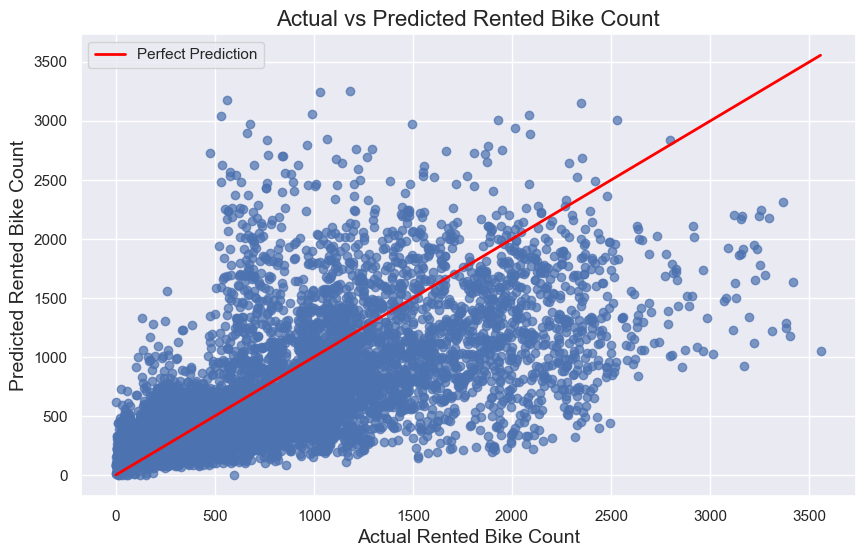

In [98]:
# Step 1: Make predictions
predicted_log_rented_bike_count = model2.predict(X2)

# Step 2: Transform predictions back to the original scale
predicted_rented_bike_count = np.expm1(predicted_log_rented_bike_count)  # Reverse log1p transformation

# Step 3: Get the actual values
actual_rented_bike_count = new_bike_df['Rented Bike Count']

# Step 4: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual_rented_bike_count, predicted_rented_bike_count, alpha=0.7)
plt.plot([actual_rented_bike_count.min(), actual_rented_bike_count.max()], 
         [actual_rented_bike_count.min(), actual_rented_bike_count.max()], 
         color='red', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.title('Actual vs Predicted Rented Bike Count', fontsize=16)
plt.xlabel('Actual Rented Bike Count', fontsize=14)
plt.ylabel('Predicted Rented Bike Count', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

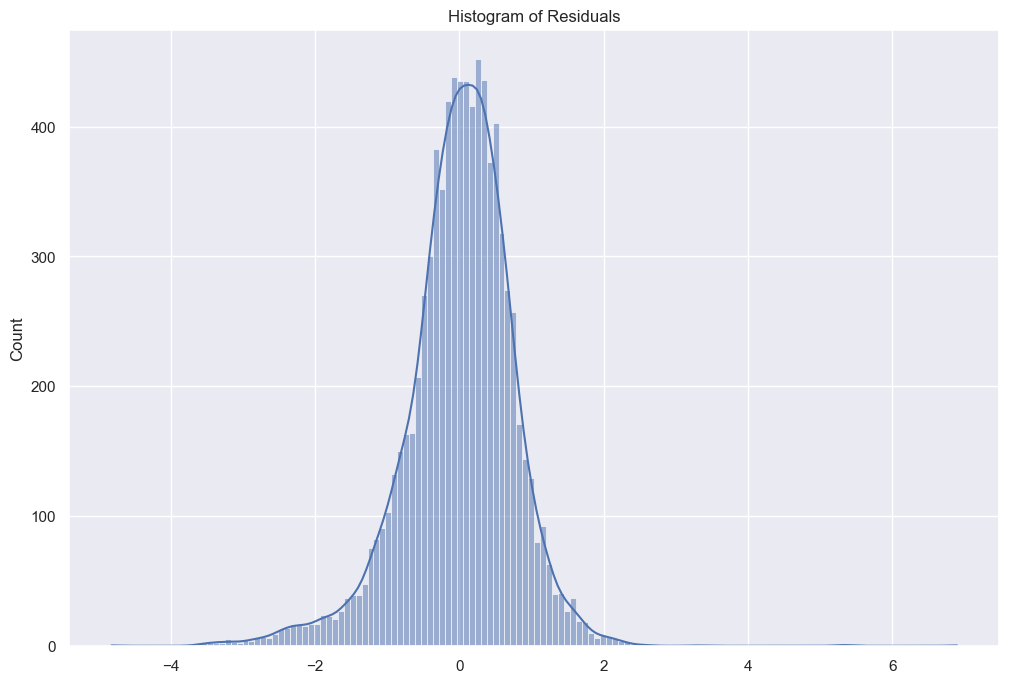

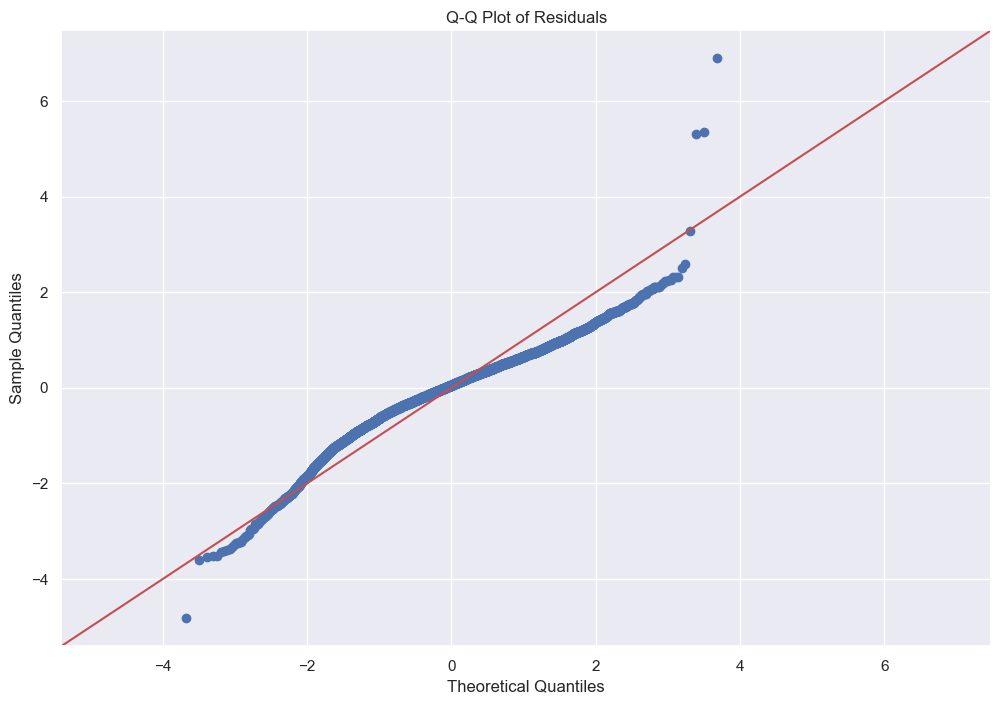

In [99]:
sns.histplot(model2.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(model2.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

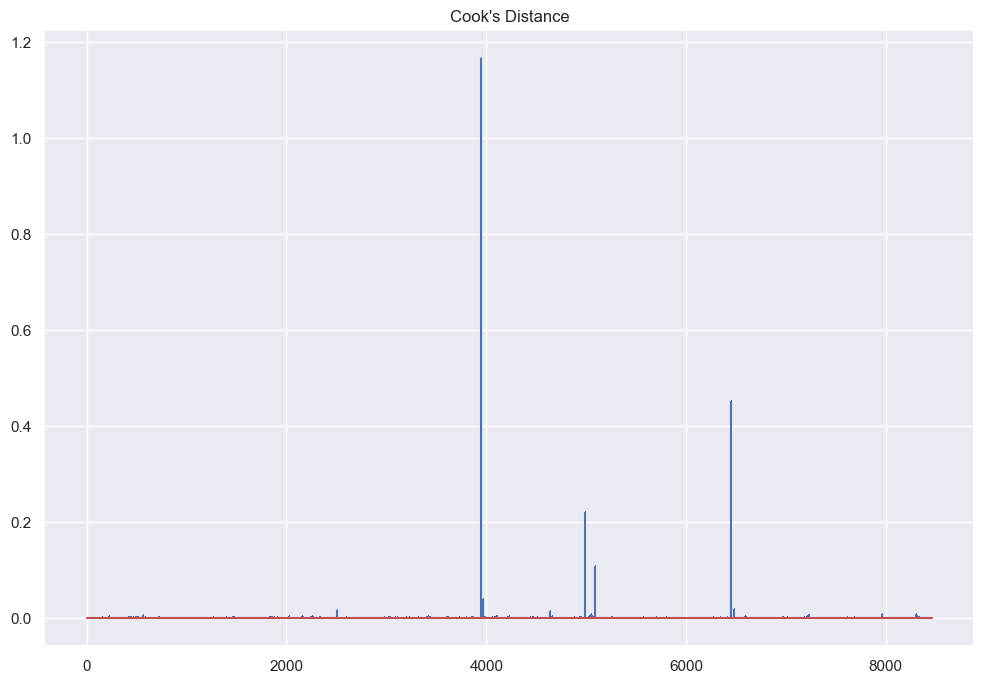

In [100]:
influence = model2.get_influence()
(c, p) = influence.cooks_distance

plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.title("Cook's Distance")
plt.show()

In [102]:
cooks_d = influence.cooks_distance[0]
cooks_d

array([3.77522948e-05, 1.01453317e-05, 1.52166756e-06, ...,
       3.67778649e-06, 6.49918743e-06, 2.18900757e-07])